## Practice notebook for data loading, cleaning, exporting and EDA with Visualizations

 Overall, this notebook offers a comprehensive analysis of YouTube trending videos, providing valuable insights into video categories, viewer engagement, and sentiment analysis of user comments.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [5]:
full_comments = pd.read_csv(r"UScomments.csv", on_bad_lines='skip')

C:\Users\17802\AppData\Local\Temp\ipykernel_21192\3130371435.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  full_comments = pd.read_csv(r"UScomments.csv", on_bad_lines='skip')


In [6]:
comments = full_comments.sample(n=10000)
comments.head()

,video_id,comment_text,likes,replies
618012,tLv3X-aMyWQ,Mais uma musica pro Fifa Avicci? Tem muita car...,0,0
577486,jXQitd7ahV4,wow,0,0
215710,-uYWFqTPHd0,hair tutorial please!!!,0,0
393688,Ga1uiDaqMjQ,🤣🤣😂😂🤣😂🤣😂,0,0
184231,JPTB93NS_8M,Hello hollyn beautifull,8,0


In [7]:
from textblob import TextBlob

In [8]:
total_rows = comments.shape[0]

### Sentiment analysis on a sample of comments

In [9]:
# Iterate over each row in the comments dataframe
for index, row in tqdm(comments.iterrows(), total=total_rows):
    # Get the comment text from the 'comment_text' column and convert it to string
    comment = str(row['comment_text'])
    
    # Check if the comment is empty
    if comment.strip() == '':
        sentiment = 0.0  # Assign neutral sentiment to empty strings
    else:
        # Perform sentiment analysis using TextBlob
        blob = TextBlob(comment)
        sentiment = blob.sentiment.polarity
    
    # Assign the sentiment value to the 'Sentiment' column
    comments.at[index, 'Sentiment'] = sentiment


  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [00:15<00:00, 629.60it/s]


In [10]:
comments.to_csv('sample_comments.csv', index=False)

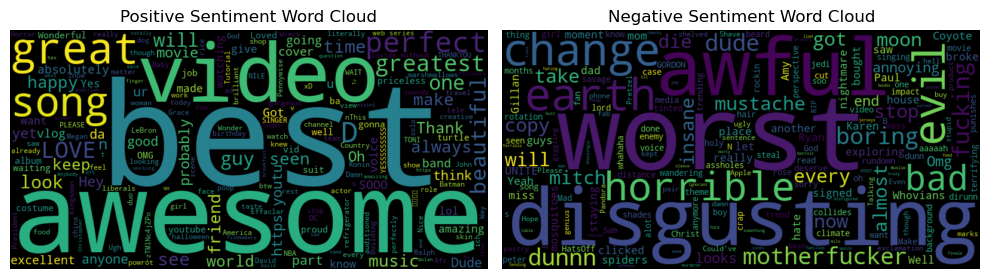

In [11]:
from wordcloud import WordCloud, STOPWORDS

# Define stopwords
stopwords = set(STOPWORDS)
# stopwords.update(['the', 'and', 'to', 'for', 'is', 'in', 'it', 'of', 'you', 'that'])

# Filter positive sentiment comments
positive_comments = comments[comments['Sentiment']==1]['comment_text']
positive_text = ' '.join(positive_comments)

# Filter negative sentiment comments
negative_comments = comments[comments['Sentiment']== -1]['comment_text']
negative_text = ' '.join(negative_comments)

# Create WordCloud objects for positive and negative sentiment comments
positive_wordcloud = WordCloud(width=800, height=400, stopwords=stopwords).generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, stopwords=stopwords).generate(negative_text)

# Display the word clouds
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()

### Loading Data

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
import os
files = os.listdir('additional_data')

In [14]:
csv_files = [file for file in files if file.endswith('.csv')]
csv_files

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [16]:
full_df = pd.DataFrame()
for file in csv_files:
    df = pd.read_csv(f'additional_data/{file}', encoding='iso-8859-1', on_bad_lines='skip')
    full_df = pd.concat([full_df, df], ignore_index=True)

In [17]:
full_df.shape

(375942, 16)

In [18]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


### Cleaning and Exporting the Data

In [19]:
full_df.drop_duplicates(inplace=True)


In [20]:
full_df.shape

(339525, 16)

In [21]:
# Export to CSV
# full_df.to_csv('full_df.csv', index=False)

# Export to JSON
# full_df.to_json('full_df.json', orient='records')

# Export to SQLite database
# import sqlite3
# conn = sqlite3.connect('full_df.db')
# full_df.to_sql('full_df', conn, if_exists='replace', index=False)
# conn.close()


### Exploratory Data Analysis

In [22]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [23]:
# full_df['category_id'] = full_df['category_id'].astype(str)

In [24]:
json_df = pd.read_json('additional_data/US_category_id.json')

In [25]:
json_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [26]:
category_dict = {}

for item in json_df['items'].values:
    category_dict[int(item['id'])] = item['snippet']['title']

In [27]:
category_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [28]:
full_df['category'] = full_df['category_id'].map(category_dict)

In [29]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music


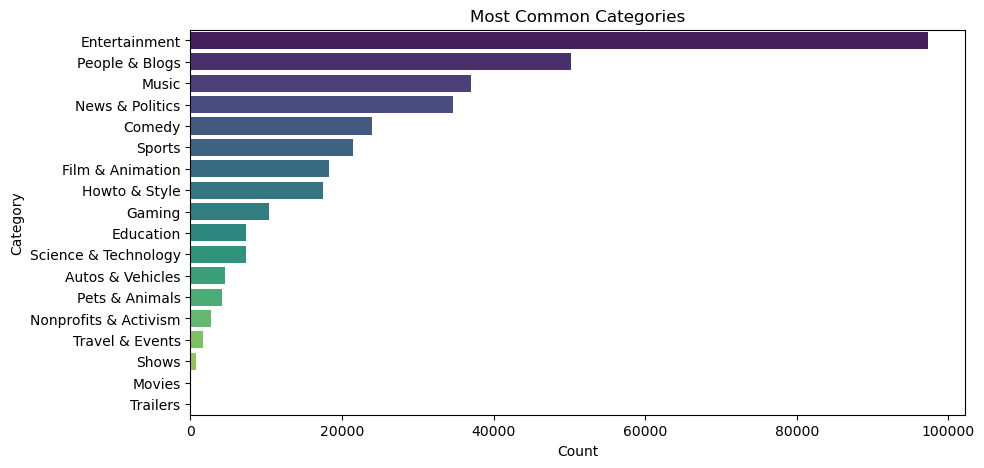

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'category' is the column name in the 'full_df' dataframe
category_counts = full_df['category'].value_counts()
most_common_categories = category_counts.index[:5]  # Get the top 5 most common categories

# Plot the findings
plt.figure(figsize=(10, 5))
sns.barplot(x=category_counts, y=category_counts.index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Most Common Categories')
plt.show()


From above we can see that the top 5 most common categories of videos put out on YouTube are - Entertainment, People & Blogs, Music, News & Politics, and Comedy.

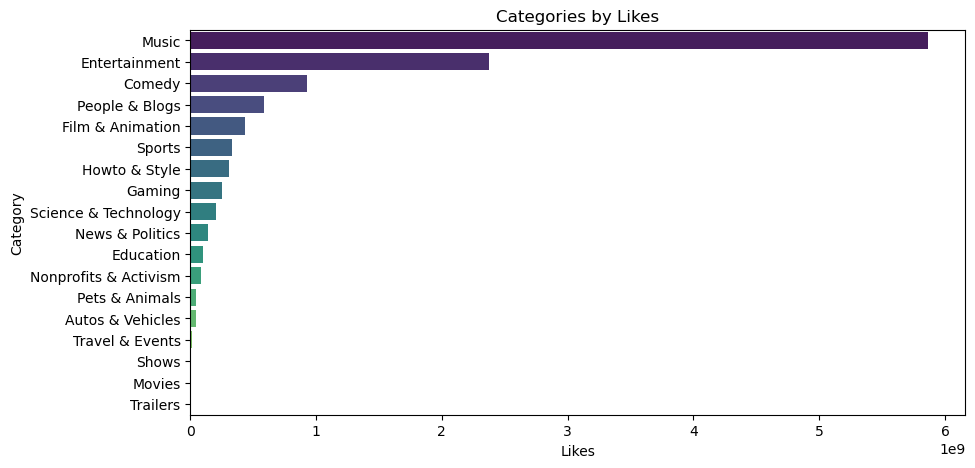

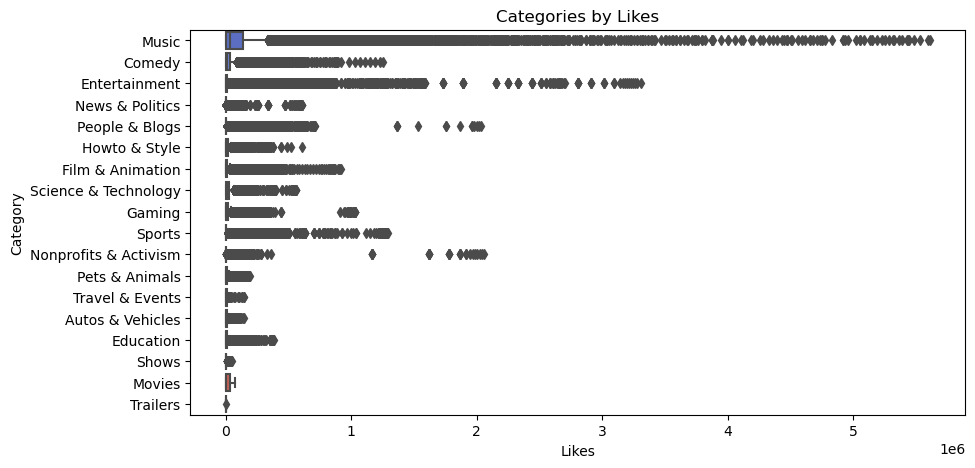

In [31]:
category_likes = full_df.groupby('category')['likes'].sum().sort_values(ascending=False)

# Plot the findings
plt.figure(figsize=(10, 5))
sns.barplot(x=category_likes, y=category_likes.index, palette='viridis')
plt.xlabel('Likes')
plt.ylabel('Category')
plt.title('Categories by Likes')

plt.figure(figsize=(10, 5))
sns.boxplot(x='likes', y='category', data=full_df, orient='h', palette='coolwarm')
plt.xlabel('Likes')
plt.ylabel('Category')
plt.title('Categories by Likes')
plt.show()


The categories that get the most likes are however, Music, Entertainment, and Comedy. Though Non-Profit category is lower on the list, it has a few outliers with likes comaparable to the top 5.

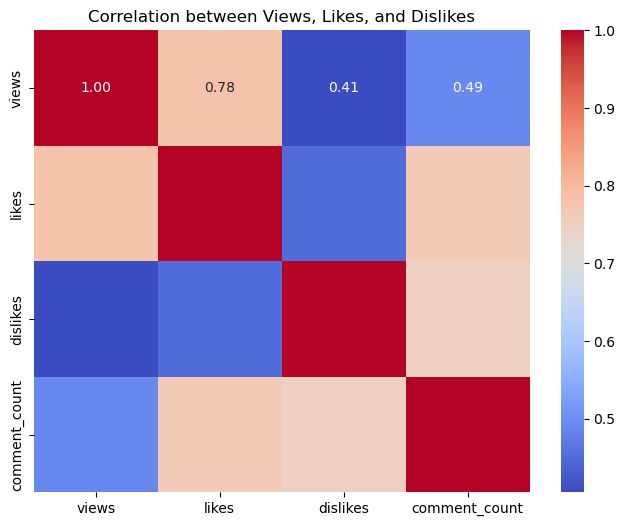

                  views     likes  dislikes  comment_count
views          1.000000  0.779531  0.405428       0.489637
likes          0.779531  1.000000  0.451809       0.763874
dislikes       0.405428  0.451809  1.000000       0.747915
comment_count  0.489637  0.763874  0.747915       1.000000


In [32]:
import seaborn as sns
correlation = full_df[['views', 'likes', 'dislikes', 'comment_count']].corr()
import matplotlib.pyplot as plt

# Assuming 'correlation' is the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Views, Likes, and Dislikes')
plt.show()
print(correlation)


From above we can see that:
1. Views and likes have a positive correlation
2. Views and comments have almost no correlation
3. The higher the number of comments, the higher the number of likes and dislikes - which makes sense regarding the user engagement on videos

In [34]:
# Calculate like rate
full_df['like_rate'] = full_df['likes'] / full_df['views']

# Calculate dislike rate
full_df['dislike_rate'] = full_df['dislikes'] / full_df['views']

# Calculate comment count rate
full_df['comment_count_rate'] = full_df['comment_count'] / full_df['views']


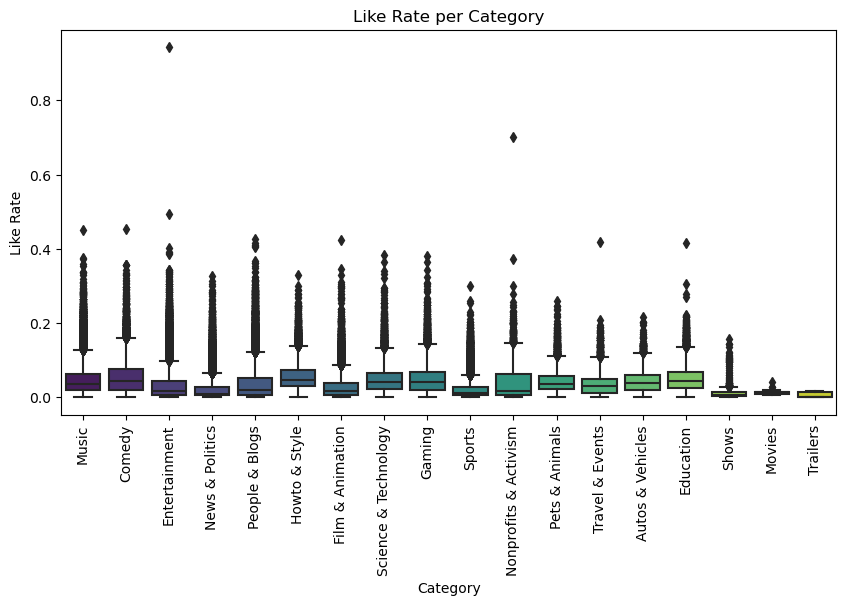

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x='category', y='like_rate', data=full_df, palette='viridis')
plt.xlabel('Category')
plt.ylabel('Like Rate')
plt.title('Like Rate per Category')
plt.xticks(rotation=90)
plt.show()


In [85]:
import plotly.express as px

# Assuming 'full_df' is the dataframe containing the data
channel_counts = full_df['channel_title'].value_counts()
top_channels = channel_counts.head(20)

# Create a bar plot using Plotly Express
fig = px.bar(x=top_channels.index, y=top_channels, labels={'x': 'Channel', 'y': 'Number of Trending Videos'},
             title='<b>Top 20 Channels with the Highest Number of Trending Videos</b>')
# fig.update_layout(width=1000, height=800)
# fig.update_xaxes(tickangle=45)

fig.update_layout(
    title={
        'x': 0.5,
        'font_size': 20,
        # 'xanchor': 'center',
        # 'yanchor': 'top'
    },
    width=1000, height=800,
    xaxis_tickangle=45
)

# Show the plot
fig.show()

The above plot shows the top 20 channels that has the most trending videos.

In [ ]:
# Static bar plot using Matplotlib

# import matplotlib.pyplot as plt

# # Create the bar plot
# fig, ax = plt.subplots()
# ax.bar(top_channels.index, top_channels, color='pink')

# # Customize the plot
# ax.set_xlabel('Channel')
# ax.set_ylabel('Number of Trending Videos')
# ax.set_title('Top 20 Channels with Most Trending Videos')
# ax.set_xticklabels(top_channels.index, rotation = 50, rotation_mode='anchor', ha='right')
# ax.figure.set_size_inches(12, 6)
# # Display the plot
# plt.show()

